# Índice

1. [Importamos los datos](#importamos-los-datos)
2. [Entrenamiento modelos y predicciones](#entrenamiento-modelos-y-predicciones)
3. [Comparación Métricas](#comparación-métricas)
4. [CONCLUSIONES](#conclusiones)

---
---

In [24]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
---
## Importamos los datos

In [25]:
df = pd.read_pickle('../../datos/tratados/encoded_scaled_df_employee_data.pkl').reset_index(drop=True)
df.sample(3)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Manager_opinion_JobInvolvement_High,Manager_opinion_JobInvolvement_Low,Manager_opinion_JobInvolvement_Medium,Manager_opinion_JobInvolvement_Very High,Manager_opinion_PerformanceRating_Excellent,Manager_opinion_PerformanceRating_Outstanding
225,0.14,0.16,0.14,0.54,False,0.27,0.15,-0.25,0.17,0.00,0.11,-0.27,0.33,-0.50,0.00,0.00,2.00,0.50,1.00,0.80,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
978,0.15,0.11,0.14,-0.08,False,0.08,0.15,0.25,0.16,0.00,0.11,-0.09,0.00,0.67,2.00,0.56,0.00,0.33,0.00,0.80,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
806,0.14,0.24,0.14,-0.08,False,0.14,0.15,0.00,0.16,-0.50,0.26,-0.49,-0.33,-0.33,0.00,-0.78,-1.00,-0.33,0.00,-0.20,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


---
---

## Entrenamiento modelos y predicciones

In [26]:
X = df.drop(columns=['Attrition'])
y = df[['Attrition']]

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [27]:
default_params = {
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [4, 5, 6, 8, 9],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [4, 6, 8]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [4, 5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

In [28]:
models_asistant = sup_models.AnalisisModelosClasificacion(df, 'Attrition')

In [29]:
models_asistant.modelos.keys()

dict_keys(['logistic_regression', 'tree', 'random_forest', 'gradient_boosting', 'xgboost'])

In [30]:
df_logistic_regresion = models_asistant.ajustar_modelo('logistic_regression')
df_logistic_regresion = models_asistant.calcular_metricas('logistic_regression')
df_logistic_regresion['modelo'] = 'logistic_regression'

df_logistic_regresion

,prediction,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo
train,train,0.85,0.83,0.85,0.78,0.07,0.77,0.00,None,logistic_regression
test,test,0.84,0.83,0.84,0.78,0.09,0.71,0.00,None,logistic_regression


In [31]:
df_tree = models_asistant.ajustar_modelo("tree", param_grid=default_params["tree"])
df_tree = models_asistant.calcular_metricas("tree")
df_tree["modelo"] = "tree"
df_tree

Fitting 8 folds for each of 27 candidates, totalling 216 fits
El mejor modelo es DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=42)


,prediction,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo
train,train,0.85,0.82,0.85,0.82,0.24,0.71,0.00,8,tree
test,test,0.83,0.79,0.83,0.79,0.16,0.62,0.00,8,tree


In [32]:
df_random_forest = models_asistant.ajustar_modelo("random_forest", param_grid=default_params["random_forest"])
df_random_forest = models_asistant.calcular_metricas("random_forest")
df_random_forest["modelo"] = "random_forest"
df_random_forest

Fitting 8 folds for each of 135 candidates, totalling 1080 fits
El mejor modelo es RandomForestClassifier(max_depth=8, min_samples_leaf=4, n_estimators=50,
                       n_jobs=-1, random_state=42)


,prediction,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo
train,train,0.88,0.89,0.88,0.84,0.33,0.96,0.04,-1,random_forest
test,test,0.84,0.81,0.84,0.78,0.11,0.71,0.04,-1,random_forest


In [33]:
df_gradient_boosting = models_asistant.ajustar_modelo("gradient_boosting", param_grid=default_params["gradient_boosting"])
df_gradient_boosting = models_asistant.calcular_metricas("gradient_boosting")
df_gradient_boosting["modelo"] = "gradient_boost"
df_gradient_boosting

Fitting 8 folds for each of 324 candidates, totalling 2592 fits
El mejor modelo es GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, n_estimators=200,
                           random_state=42, subsample=0.8)


,prediction,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo
train,train,1.00,1.00,1.00,1.00,0.99,1.00,0.01,8,gradient_boost
test,test,0.85,0.83,0.85,0.83,0.33,0.72,0.01,8,gradient_boost


In [34]:
df_xgboost = models_asistant.ajustar_modelo("xgboost", param_grid=default_params["xgboost"])
df_xgboost = models_asistant.calcular_metricas("xgboost")
df_xgboost["modelo"] = "x_gradient_boost"
df_xgboost

Fitting 8 folds for each of 288 candidates, totalling 2304 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,prediction,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo
train,train,0.96,0.96,0.96,0.96,0.84,0.99,0.03,None,x_gradient_boost
test,test,0.85,0.83,0.85,0.83,0.31,0.72,0.03,None,x_gradient_boost


---
---
## Comparación Métricas
#### Comparamos las metricas de todos nuestros modelos

In [35]:
df_completo = pd.concat([df_logistic_regresion, df_tree, df_random_forest, df_gradient_boosting, df_xgboost])
df_completo.reset_index(drop=True, inplace=True)
df_completo.style.apply(sup_models.color_filas_por_modelo, axis = 1)

,prediction,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo
0,train,0.846025,0.831577,0.846025,0.784448,0.071570,0.773852,0.002988,None,logistic_regression
1,test,0.839465,0.825514,0.839465,0.777876,0.088530,0.714779,0.002988,None,logistic_regression
2,train,0.851883,0.824020,0.851883,0.819916,0.244657,0.711846,0.001994,8,tree
3,test,0.832776,0.790741,0.832776,0.791381,0.157082,0.622008,0.001994,8,tree
4,train,0.876987,0.889696,0.876987,0.843175,0.333908,0.958162,0.036876,-1,random_forest
5,test,0.839465,0.813516,0.839465,0.782914,0.111001,0.707952,0.036876,-1,random_forest
6,train,0.997490,0.997497,0.997490,0.997481,0.990552,1.000000,0.012954,8,gradient_boost
7,test,0.852843,0.831301,0.852843,0.830642,0.333063,0.723936,0.012954,8,gradient_boost
8,train,0.960669,0.962059,0.960669,0.958458,0.837309,0.994653,0.034883,None,x_gradient_boost
9,test,0.852843,0.831032,0.852843,0.825490,0.305018,0.716386,0.034883,None,x_gradient_boost


(nos quedamos con el ```Gradient Boost``` poruqe aunque tenga overfitting, en el test nos da un buen balance entre precision y recall aunque se pueden mejorar. (también habría que intentar subir el kappa))

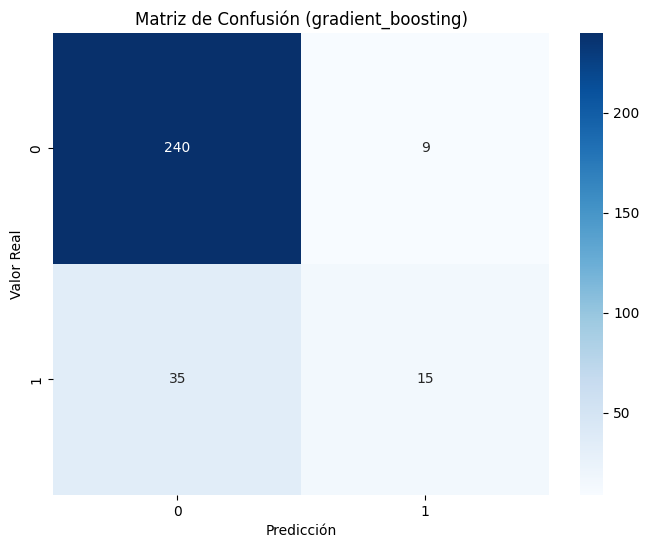

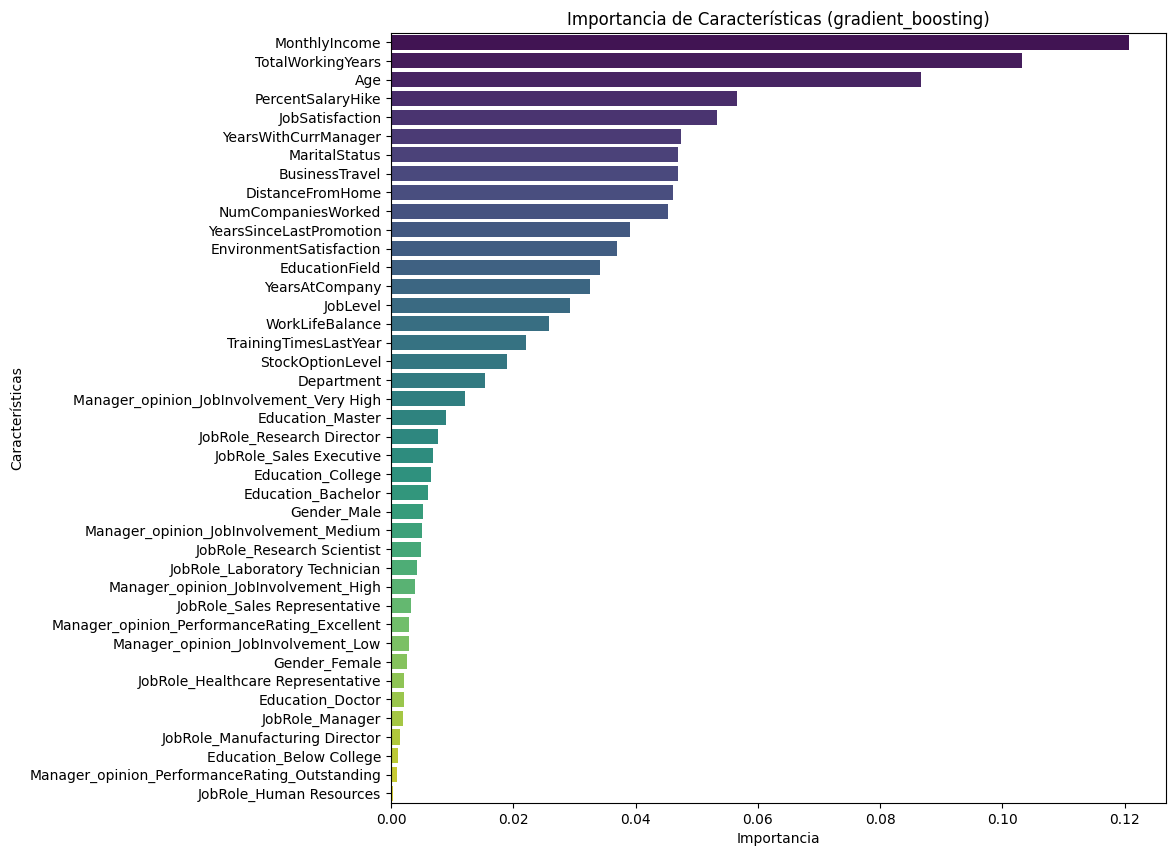

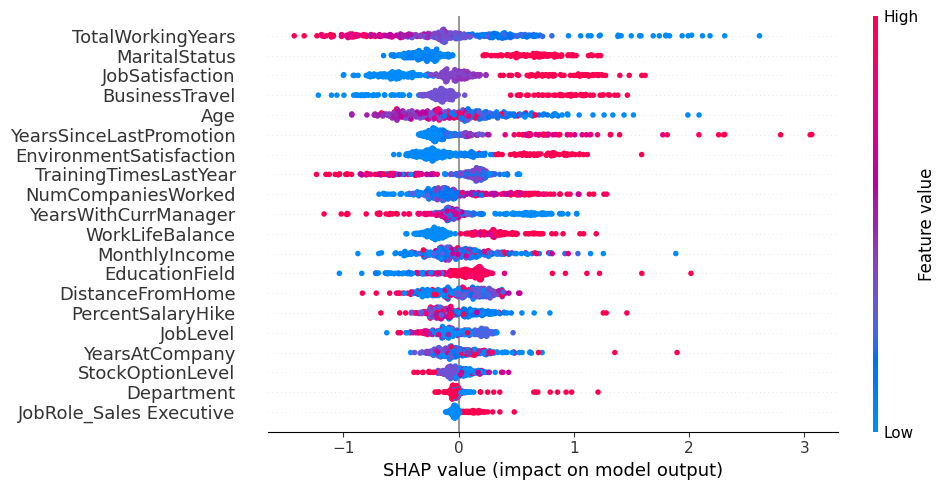

In [42]:
models_asistant.plot_matriz_confusion("gradient_boosting")
models_asistant.importancia_predictores(modelo_nombre ='gradient_boosting', figsize=(10,10))
models_asistant.plot_shap_summary(modelo_nombre="gradient_boosting")

---
---
## CONCLUSIONES
#### Conclusiones obtenidas tras realizar el estudio respondiendo a las cuestiones que se nos planteaban al principio del proyecto. Las cuales eran:

- Resumen de hallazgos: ¿Cuáles son los factores más relevantes que afectan la retención de empleados? ¿Qué variables tienen mayor peso en las predicciones del modelo?

- Recomendaciones: Basándote en el análisis y el modelo, sugiere acciones que la empresa podría tomar para mejorar la retención.

- Por ejemplo, ¿se deben ajustar las políticas de horarios flexibles? ¿O tal vez invertir más en programas de bienestar?

- Evaluación del proyecto: Reflexiona sobre los puntos fuertes y débiles de tu modelo y cómo podría mejorarse.

### **1. Factores más relevantes que afectan la retención de empleados**

#### **Variables clave:**
1. ```TotalWorkingYears```: nos dice que hay un problema en los empleados con más experiencia. Podrían sentirse estancados o con responsabilidades las caules no van a corde con sus beneficios.
2. ```MonthlyIncome```: Un ingreso mensual bajo parece correlacionarse con una mayor probabilidad de abandono.
3. ```JobSatisfaction y EnvironmentSatisfaction```: La satisfacción en el trabajo y con el entorno laboral parece ser clave.
4. ```Age```: Los empleados más jóvenes tienden a tener mayores tasas de abandono, probablemente terminan buscando mejores oportunidades o mayor sueldo.
5. ```WorkLifeBalance```: Un mal balance entre trabajo y vida personal contribuye negativamente.
6. ```YearsSinceLastPromotion```: La falta de promociones en largos períodos es un indicador de insatisfacción.
7. ```PercentSalaryHike```: Incrementos salariales insuficientes podrían ser otra causa para terminar abandonando si el salario no incrementa proporcionalmente a las responsabilidades adquiridas.

---

### **2. Variables con mayor peso en las predicciones del modelo**
Las gráficas de SHAP y la importancia de características muestran que:
- Las variables financieras y de trayectoria profesional (ingreso, años de experiencia, promociones) tienen mayor influencia.
- Las métricas de satisfacción laboral y personal son críticas para entender las razones de abandono.
- Factores relacionados con el entorno inmediato (departamento, manager actual, etc.) también afectan, pero con menor peso relativo.

---

### **3. Recomendaciones para mejorar la retención**

#### **Acciones prioritarias:**
1. **Revisión salarial y beneficios**:
   - Implementar ajustes salariales competitivos, especialmente para empleados con menor ingreso relativo.
   - Diseñar esquemas de bonos basados en desempeño y años en la empresa.
2. **Políticas de horarios flexibles**:
   - Ofrecer opciones de teletrabajo o flexibilidad horaria podría mejorar el balance vida-trabajo y la satisfacción general.
3. **Programas de bienestar**:
   - Introducir iniciativas como sesiones de bienestar mental, beneficios de salud, y actividades recreativas para mejorar la satisfacción del entorno laboral.
4. **Desarrollo profesional**:
   - Crear planes claros de carrera con promociones y capacitación para mantener motivados a los empleados.
5. **Evaluación continua del entorno**:
   - Realizar encuestas regulares sobre satisfacción laboral y actitudes hacia el trabajo para ajustar políticas en tiempo real.
